In [21]:
import numpy as np  
import pandas as pd 
import csv
import urllib

csv_cont = urllib.request.urlopen(url)
csv_cont = csv_cont.read() #.decode('utf-8')

# Optional: saving the data to your local drive
with open('./wine_data.csv', 'wb') as out:
    out.write(csv_cont)

# reading in all data into a NumPy array
all_data = np.loadtxt(open("./wine_data.csv","r"),
        delimiter=",",
        skiprows=0,
        dtype=np.float64
        )

# load class labels from column 1
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])


# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))



total number of samples (rows): 178
total number of features (columns): 13
Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)


In [27]:
# Standardization
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [29]:
# Min-Max scaling (Normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

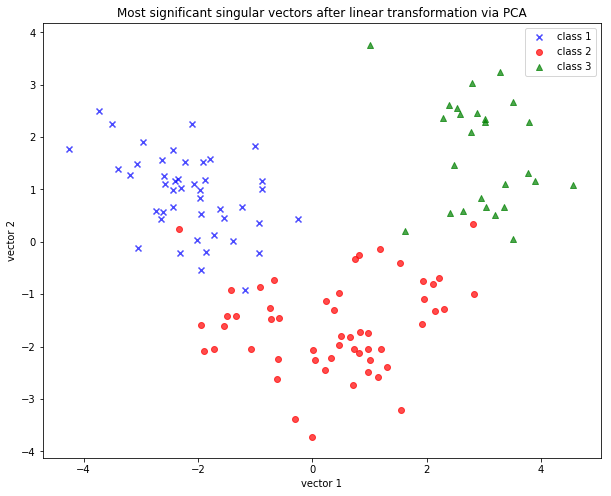

array([0.35515711, 0.21222703, 0.10282865, 0.07642457, 0.0621589 ,
       0.04574064, 0.038754  , 0.02680474, 0.0234847 , 0.02266076,
       0.01488421, 0.01156267, 0.00731202])

In [35]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
sklearn_pca = PCA(n_components=2) # number of components to keep
sklearn_transf = sklearn_pca.fit_transform(X_train)
plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    plt.scatter(x=sklearn_transf[:,0][y_train == label],
                y=sklearn_transf[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_train)
sklearn_pca.explained_variance_ratio_

In [36]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

ModuleNotFoundError: No module named 'sklearn.lda'